In [1]:
import tensorflow as tf

#import NMIST data,手写数字
#MNIST
from tensorflow.examples.tutorials.mnist import input_data
#手写数字
mnist = input_data.read_data_sets("./", one_hot=True)

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


In [2]:
image = mnist.train.images
import matplotlib.pyplot as plt
%matplotlib inline

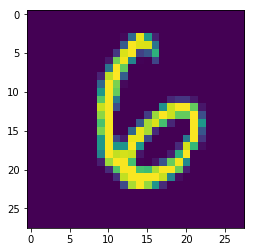

In [3]:
#获取第1024个
plt.imshow(image[1024].reshape((28,28)))

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.])

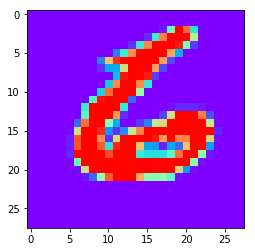

In [4]:
test = mnist.test
test_images = test.images
test_images.shape
plt.imshow(test_images[9999].reshape((28,28)),cmap = 'rainbow')
test.labels[9999]

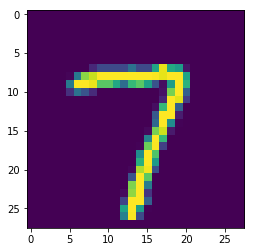

In [5]:
train = mnist.train
images = train.images
digits = images[100]
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.reshape((28,28)))

In [7]:
#softmax例子 结果的和等于1
s = tf.nn.softmax([3,1,-3.0])

with tf.Session() as sess:
    print(sess.run(s))

[ 0.87887824  0.11894324  0.00217852]


In [8]:
images.shape

(55000, 784)

In [9]:
mnist.train.labels.shape

(55000, 10)

In [10]:
mnist.train.labels[:5]
#label 第一行7

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

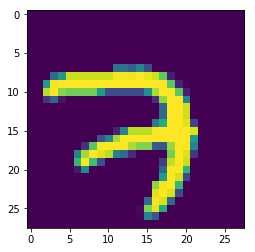

In [13]:
plt.imshow(images[0].reshape((28,28)))

In [16]:
# parameters
learning_rate = 0.01
training_epochs = 25
#batch 一批，每次训练给算法100个数据
batch_size = 100
#每隔五次，打印输出运算的结果
display_step = 5

#矩阵
#tf Graph Input
#None 随意多少个样本
X = tf.placeholder(tf.float32, shape = [None,784])#mnist data image of shape 28*28=784
#y ...> label
Y = tf.placeholder(tf.float32, shape = [None,10])#0-9 digits recognition => 10 classes

#瞎蒙了一个数据
#Set model weights变量
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

#创造了数据之间模型，线性，矩阵乘法
#Construct model
#y_pred 预测的结果==q
#matmul 矩阵乘法 mat：matrix
y_pred = tf.matmul(X, W) + b

#求解了所有预测结果的概率化的结果
pred = tf.nn.softmax(y_pred)# softmax归一化

#损失函数
#Minimize error using cross entropy 交叉熵
#y == p
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(pred), axis=1))
#Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

#Initialize the variables(i.e.assign their default value)
init = tf.global_variables_initializer()

In [22]:
#start training
with tf.Session() as sess:
    sess.run(init)
    
    #Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        #总的训练的批次
        total_batch = int(mnist.train.num_examples/batch_size)#550
        for i in range(total_batch):
            #每次取出100个数据作为训练数据
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs,Y: batch_ys})
            #Compute average loss
            #平均的交叉熵
            avg_cost += c / total_batch
        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print(batch_xs.shape,batch_ys.shape)
            print("Epoch:",'%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
            
    print("Optimization Finished!")
    
    #Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
    #Calculate accuracy for 3000 examples
    #tf.cast类型转换
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({X: mnist.test.images[:3000], Y: mnist.test.labels[:3000]}))

((100, 784), (100, 10))
('Epoch:', '0005', 'cost=', '0.465538799')
((100, 784), (100, 10))
('Epoch:', '0010', 'cost=', '0.392434158')
((100, 784), (100, 10))
('Epoch:', '0015', 'cost=', '0.362709362')
((100, 784), (100, 10))
('Epoch:', '0020', 'cost=', '0.345429921')
((100, 784), (100, 10))
('Epoch:', '0025', 'cost=', '0.333704537')
Optimization Finished!
('Accuracy:', 0.88933331)
